In [77]:
import numpy as np
import pandas as pd

In [78]:
data = pd.read_csv('esd.csv', encoding='ISO-8859-1')


In [79]:
data.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
397,ham,You are always putting your business out there...,NaN,NaN,NaN
5070,ham,As in different styles?,NaN,NaN,NaN
3614,ham,I enjoy watching and playing football and bask...,NaN,NaN,NaN
2755,ham,We r outside already.,NaN,NaN,NaN
600,ham,Mind blastin.. No more Tsunamis will occur fro...,NaN,NaN,NaN


In [80]:
data_shape = data.shape

In [81]:
data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [82]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [83]:
data.sample(5)

,v1,v2
3534,ham,I'm at home. Please call
4706,ham,Wif my family booking tour package.
4426,ham,So what did the bank say about the money?
655,ham,Tell them the drug dealer's getting impatient
1177,ham,Just nw i came to hme da..


In [84]:
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data.sample(5)

,target,text
1829,spam,Hottest pics straight to your phone!! See me g...
2278,ham,Hmm...Bad news...Hype park plaza $700 studio t...
2515,ham,Bognor it is! Should be splendid at this time ...
1588,ham,At 4. Let's go to bill millers
15,spam,"XXXMobileMovieClub: To use your credit, click ..."


In [85]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [86]:
data['target'] = encoder.fit_transform(data['target'])

In [87]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [88]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [89]:
data.duplicated().sum()

403

In [90]:
data.duplicated().sum()

403

In [91]:
data.shape

(5572, 2)

In [92]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
data['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

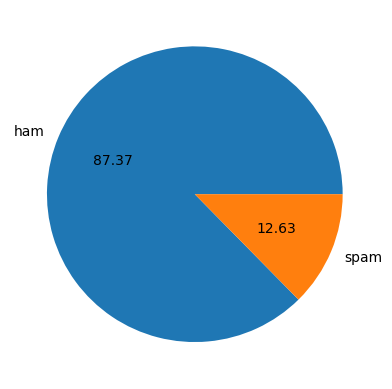

In [95]:
plt.pie(target_value_counts, labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [96]:
import nltk

In [97]:
!pip install nltk

In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
data['num_characters'] = data['text'].apply(len)

In [100]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [101]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [102]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [103]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [104]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [105]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [106]:
# ham
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [107]:
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [108]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

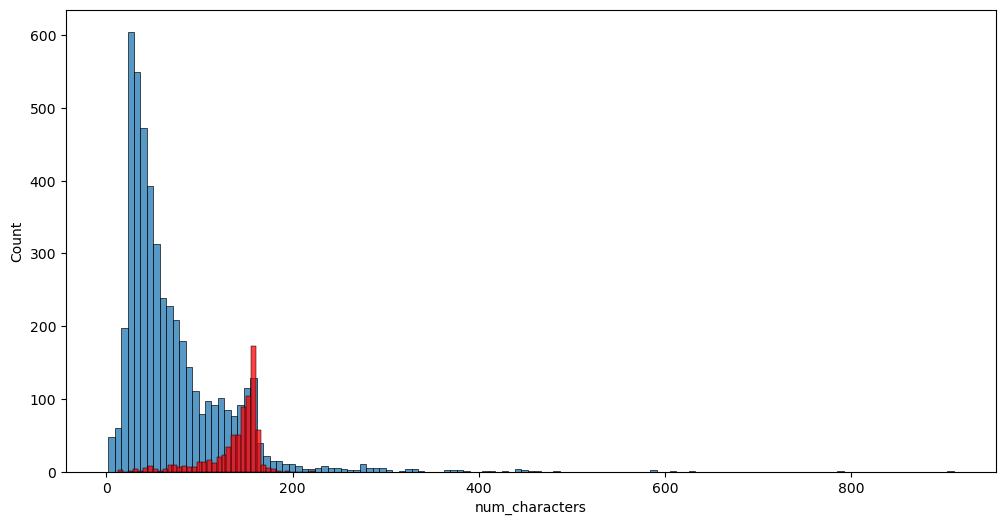

In [109]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

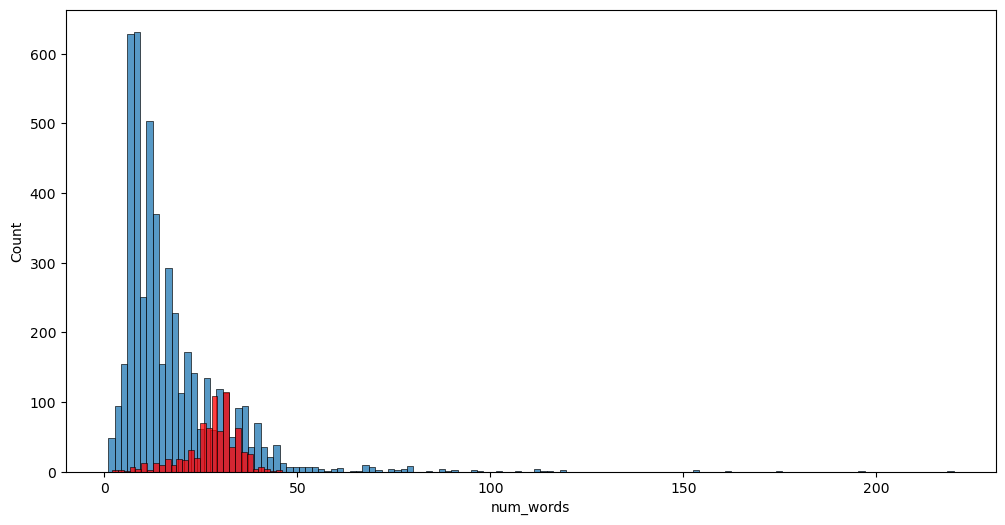

In [110]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

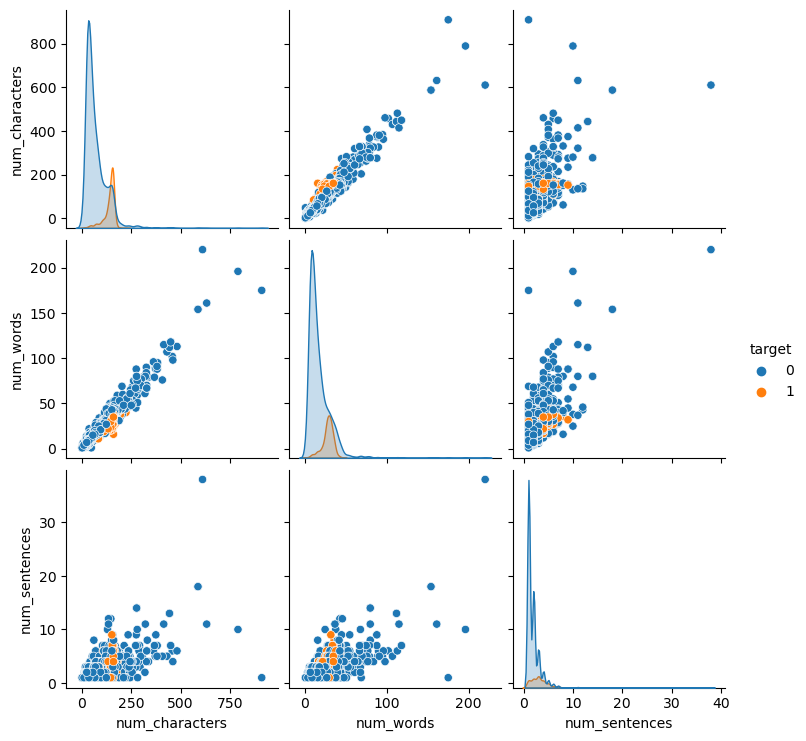

In [111]:
sns.pairplot(data,hue='target')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11388\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

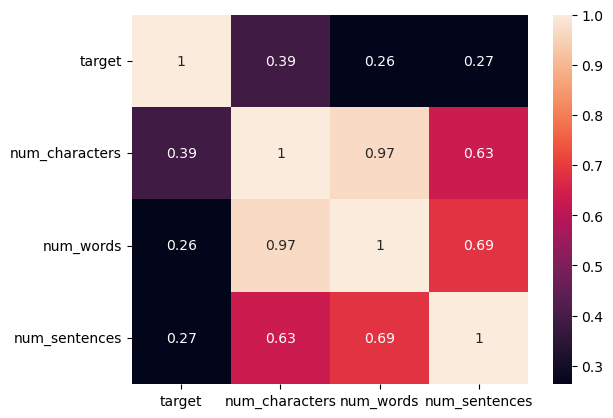

In [112]:
sns.heatmap(data.corr(),annot=True)

In [113]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [114]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [115]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [125]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.7 MB 6.0 MB/s eta 0:00:17
   ---------------------------------------- 0.4/99.7 MB 5.4 MB/s eta 0:00:19
   ---------------------------------------- 0.6/99.7 MB 4.9 MB/s eta 0:00:21
   ---------------------------------------- 0.9/99.7 MB 5.2 MB/s eta 0:00:19
    --------------------------------------- 1.3/99.7 MB 6.5 MB/s eta 0:00:16
    --------------------------------------- 1.6/99.7 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 1.9/99.7 MB 6.5 MB/s eta 0:00:16
    --------------------------------------- 2.2/99.7 MB 6.7 MB/s eta 0:00:15
    --------------------------------------- 2.4/99.7 MB 6.2 MB/s eta 0:00:16
   - ---------------------------

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [127]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [128]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [129]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision